# Заполнение пропусков

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('weather.csv')

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Узнаем количество пропущенных значений в каждом из признаков

In [5]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Выпишем все вещественные признаки

In [6]:
numerical_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine','Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm'
                  , 'Humidity9am', 'Humidity3pm','Cloud3pm', 'Cloud9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

Узнаем, сколько пропущенных значений у каждого вещественного признака

In [7]:
df[numerical_cols].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Sunshine         69835
Evaporation      62790
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Cloud3pm         59358
Cloud9am         55888
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
dtype: int64

Заполним все пропущенные значения. Для каждого вещественного признака вычислим его среднее и присвоим пропущенным значениям найденный результат

In [8]:
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

In [9]:
df[numerical_cols].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Sunshine         0
Evaporation      0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Cloud3pm         0
Cloud9am         0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
dtype: int64

Выпишем все категориальные признаки

In [10]:
categorical_cols = ['Location' ,'Date', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

Узнаем, сколько пропущенных значений у каждого категориального признака

In [11]:
df[categorical_cols].isnull().sum()

Location           0
Date               0
WindGustDir    10326
WindDir9am     10566
WindDir3pm      4228
dtype: int64

Заполним все пропущенные значения категориальных признаков значением 'without_value'

In [12]:
df[categorical_cols] = df[categorical_cols].fillna('without_value')

In [13]:
df[categorical_cols].isnull().sum()

Location       0
Date           0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
dtype: int64

Узнаем, сколько пропущенных значений у целевого признака

In [14]:
df['RainTomorrow'].isnull().sum()

3267

Удалим все записи с пропущенным целевым признаком так как они не будут вносить никакой вклад в окончательный прогноз

In [15]:
df = df.dropna()

In [16]:
df['RainTomorrow'].isnull().sum()

0

In [17]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Таким образом, все пропущенные значения датафрейма были заполнены

# Перекодирование признаков

Так как в датафрейме имеется категориальный признак дата, то этот признак нужен привести к 3-м вещественным признакам - день, месяц, год

In [18]:
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')

In [19]:
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day

Так как признак Date был перекодирован, то его можно удалить

In [20]:
df.drop('Date', axis = 1, inplace = True)

In [21]:
categorical_cols.remove('Date')

Перекодируем все категориальные признаки с помощью One-hot кодирования

In [22]:
new_df = pd.get_dummies(df, columns=categorical_cols)

In [23]:
new_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_without_value
0,13.4,22.9,0.6,5.468232,7.611178,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,5.468232,7.611178,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,1,0
2,12.9,25.7,0.0,5.468232,7.611178,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,1,0
3,9.2,28.0,0.0,5.468232,7.611178,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,5.468232,7.611178,41.0,7.0,20.0,82.0,33.0,...,1,0,0,0,0,0,0,0,0,0


Так как в датафрейме у бинарных признаков присутствуют значения 'Yes/No', то их нужно перекодировать и присвоить всем признакам с этими значениями соответсвенно 1 и 0.

In [24]:
new_df['RainToday']

0         No
1         No
2         No
3         No
4         No
          ..
145454    No
145455    No
145456    No
145457    No
145458    No
Name: RainToday, Length: 140787, dtype: object

In [25]:
new_df['RainTomorrow']

0         No
1         No
2         No
3         No
4         No
          ..
145454    No
145455    No
145456    No
145457    No
145458    No
Name: RainTomorrow, Length: 140787, dtype: object

In [26]:
mapping = {'No' : 0, 'Yes' : 1 }

In [27]:
new_df['RainToday'] = new_df['RainToday'].map(mapping)

In [28]:
new_df['RainToday']

0         0
1         0
2         0
3         0
4         0
         ..
145454    0
145455    0
145456    0
145457    0
145458    0
Name: RainToday, Length: 140787, dtype: int64

In [29]:
new_df['RainTomorrow'] = new_df['RainTomorrow'].map(mapping)

In [30]:
new_df['RainTomorrow']

0         0
1         0
2         0
3         0
4         0
         ..
145454    0
145455    0
145456    0
145457    0
145458    0
Name: RainTomorrow, Length: 140787, dtype: int64

Сохраним обработанные данные в новый .csv файл

In [31]:
new_df.to_csv('weather_preprocessed.csv', index=False)

# Визуализация данных 

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [33]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Columns: 121 entries, MinTemp to WindDir3pm_without_value
dtypes: float64(16), int64(5), uint8(100)
memory usage: 37.1 MB


In [34]:
new_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_without_value
0,13.4,22.9,0.6,5.468232,7.611178,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,5.468232,7.611178,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,1,0
2,12.9,25.7,0.0,5.468232,7.611178,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,1,0
3,9.2,28.0,0.0,5.468232,7.611178,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,5.468232,7.611178,41.0,7.0,20.0,82.0,33.0,...,1,0,0,0,0,0,0,0,0,0


Построим график распределения температуры в 3 часа дня (признак 'Temp3pm'). На оси X показаны значения температуры, а на оси y соответственно их количество.

Text(0.5, 0, 'Temp')

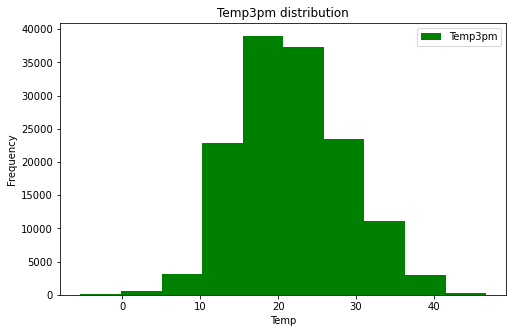

In [35]:
new_df.plot(y='Temp3pm', kind='hist', color='green', title='Temp3pm distribution')
plt.xlabel('Temp')

Построим график зависимости выпавших осадков от года. Выберем нужные нам столбцы, затем посчитаем суммарное количество выпавших осадков за каждый год и у получившегося датафрейма вызовем метод plot без параметров.

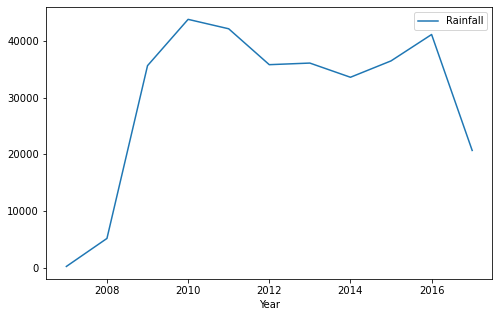

In [36]:
new_df[['Year'] + ['Rainfall']].groupby('Year').sum().plot()

На графике видно, что после 2016 года количество выпадаемых осадков стало уменьшаться.

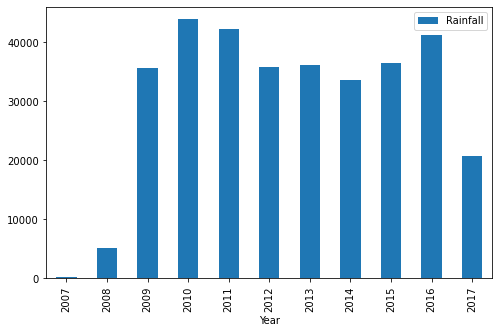

In [37]:
new_df[['Year'] + ['Rainfall']].groupby('Year').sum().plot(kind='bar')

Построим график типа pair plot, который поможет посмотреть как связаны между собой различные признаки

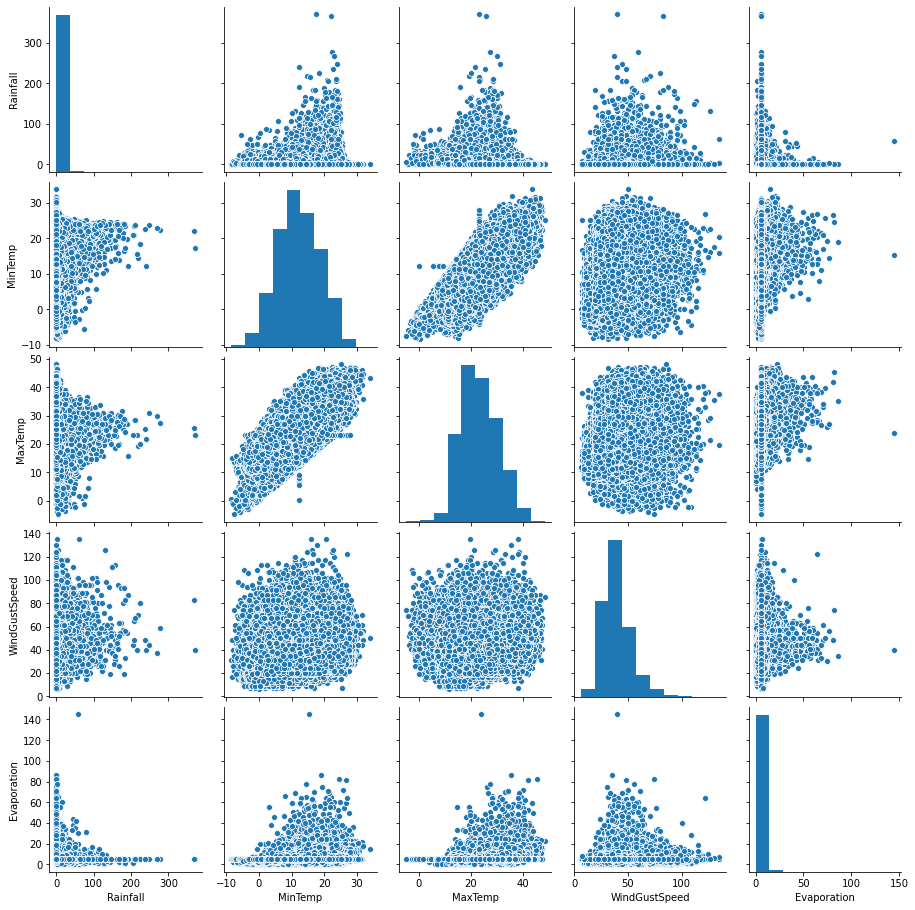

In [38]:
sns.pairplot(new_df[['Rainfall', 'MinTemp', 'MaxTemp', 'WindGustSpeed', 'Evaporation']])

Построим распределение dist plot и посмотрим на распределение скорости самого сильного ветра за 24 часа.

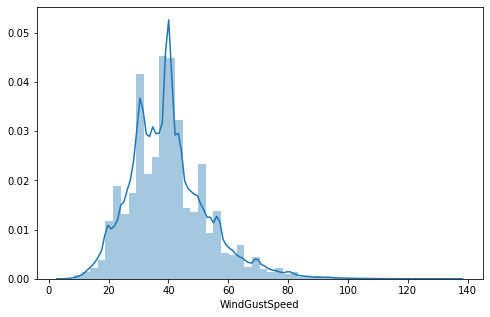

In [39]:
sns.distplot(new_df['WindGustSpeed'])

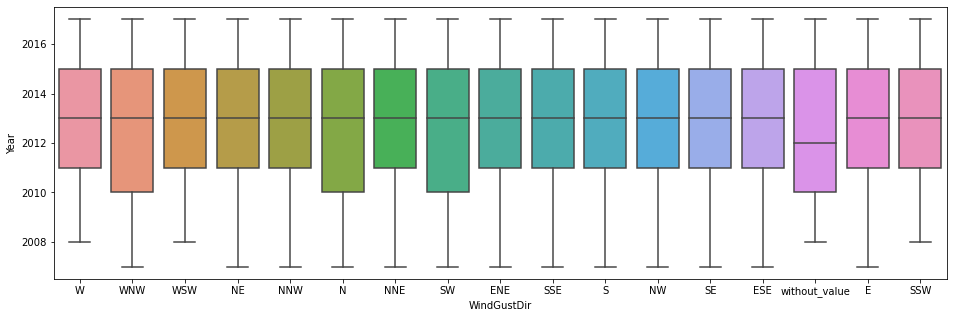

In [40]:
plt.figure(figsize=(16, 5))
sns.boxplot(x='WindGustDir', y='Year', data=df)

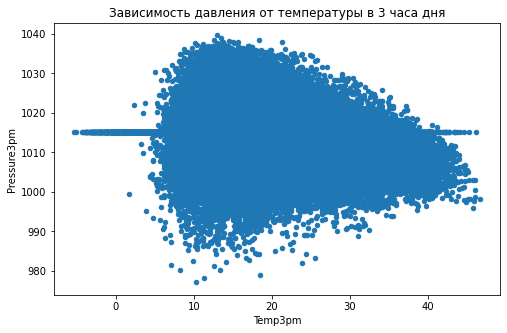

In [41]:
new_df.plot(x='Temp3pm', y='Pressure3pm', kind='scatter', title='Зависимость давления от температуры в 3 часа дня')

Построим график heat map, который позволяет посмотреть на распределение какого-то численного признака по двум категориальным. Визуализируем суммарное выпадение осадков по местоположению метеостанций и направлению самого сильного порыва ветра за 24 часа.

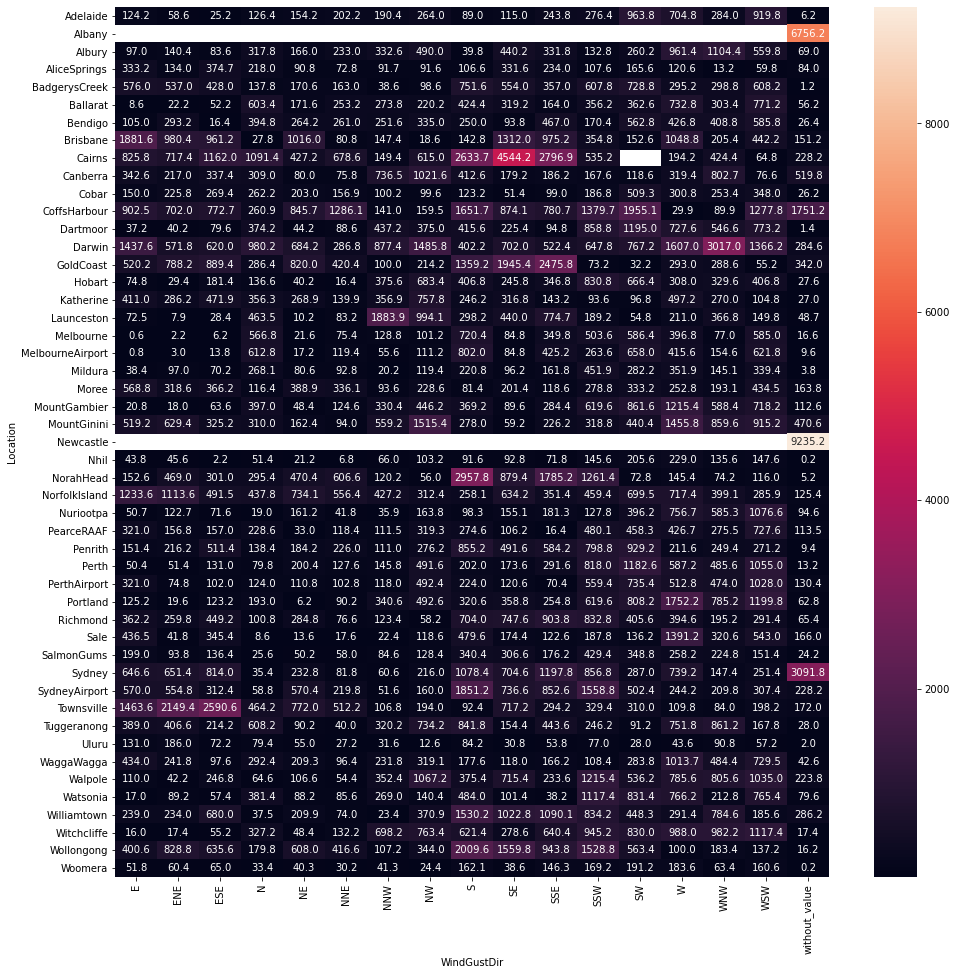

In [42]:
rainfall_sum = df.pivot_table(index='Location', columns='WindGustDir', values='Rainfall', aggfunc='sum').applymap(float)
plt.figure(figsize = (16,16))
sns.heatmap(rainfall_sum, annot=True, fmt=".1f")